<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>



![alt](https://)

Cree una copia de este Notebook en su Drive y desarrolle el taller sobre ese documento copia. Para crear la copia debe dar click en el botón **Copiar en Drive** ubicado en el panel superior, se abrirá un nuevo notebook que podrá manipular a su antojo y que se almacenará en su Drive dentro de la Carpeta *Colab Notebooks*.

# **Predicción del precio de hospedajes en Airbnb para la ciudad de Amsterdam**

**Contexto:** Airbnb es una empresa que ofrece una plataforma de software dedicada a la oferta de alojamientos particulares y turísticos mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios. Muchos nuevos anfitriones no cuentan con información global de tendencias del mercado por lo que sus precios no son óptimos. Airbnb gana una comisión por cada arrendamiento, por lo tanto, está interesado en que sus anfitriones cobren una tarifa óptima de acuerdo a las características del hospedaje. Si los anfitriones ganan más… Airbnb también.

**Problema de Negocio:** La empresa Airbnb lo ha contratado para desarrollar un análisis descriptivo y exploratorio que permita responder la siguiente pregunta: ¿Cuál es la variable o característica más relevante para determinar el precio de un hospedaje en Airbnb?

**Sistema de información:** El conjunto de datos objetivo posee información acerca de 30.000 hospedajes de la plataforma Airbnb en la ciudad de Nueva York. Los datos a usar son datos públicos creados por Inside Airbnb, para más información puede consultar [aquí]( http://insideairbnb.com/get-the-data/).


## Indicaciones para resolver el Taller

El objetivo de este taller es que usted pueda desarrollar algunas tareas de limpieza para asegurar la calidad del análisis. Para ello tendrá que programar, investigar y analizar todos los resultados que vaya obteniendo. Tenga en cuenta las siguientes indicaciones:

* Añada comentarios al código para que documente sus soluciones. 
* Coloque su análisis en una celda de Texto luego de cada resultado.
* Para resolver un ejercicio puede usar tantas celdas de Código o Texto como requiera.

Si se le presenta un error de código o duda. Siga los siguientes pasos:
1. Lea y entienda el error, para ello puede buscar en la documentación de la librería o googlearlo
2. Intente resolverlo
3. Comuníquese con el expero temático usando el Foro, recuerde enviar un pantallazo del error y mencionar que Ejercicio está solucionando. **Abstengase de compartir el link de su Notebook en el Foro.**



A continuación, se listan algunos recursos que pueden ser valiosos para su análisis.
* En esta página puede encontrar las gráficas que se pueden construir dependiendo de las variables disponibles, una breve explicación de cada gráfica y código para construir cada visualización. https://www.data-to-viz.com/
* Documentación de Pandas. https://pandas.pydata.org/docs/index.html
* Documentación de Seaborn. https://seaborn.pydata.org/index.html


## Instalar, actualizar y cargar las librerías necesarias

A continuación vamos a cargar las librerías necesarias para el desarrollo de este caso.

In [243]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [244]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.8.5
NumPy 1.23.0
Pandas 1.4.3
Matplotlib 3.5.2
Seaborn 0.11.2


Este caso fue creado con las siguientes versiones:

```
Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
```

## Cargar el dataset de trabajo

In [245]:
pd.options.display.max_columns = 100 # Permite visualizar todas las columnas del dataframe

airbnb = pd.read_excel('https://github.com/chris78rey/DIPLOM_BIGDATA/blob/main/amsterdam_airbnb_sintop.xlsx?raw=true')
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23726706,https://www.airbnb.com/rooms/23726706,20220605131734,2022-06-05,Private room 20 minutes from Amsterdam + Break...,Cousy private room 20 min. from Amsterdam. Sh...,We live in a nice Cousy and clean house with e...,https://a0.muscache.com/pictures/eb6d6636-02d6...,122619127,https://www.airbnb.com/users/show/122619127,Patricia,2017-03-26,"Diemen, North Holland, Netherlands","Hi, Welcome. we are so glade we are able to op...",within an hour,100%,95%,f,https://a0.muscache.com/im/pictures/user/52706...,https://a0.muscache.com/im/pictures/user/52706...,--,1,1,"['email', 'phone', 'work_email']",t,t,"Diemen, Noord-Holland, Netherlands",IJburg - Zeeburgereiland,--,52.34916,4.97879,Private room in home,Private room,2,3,1 shared bath,1,1,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",88.0,2,14,2,2,1125,1125,2.0,1125.0,--,t,0,6,20,66,2022-06-05,78,11,3,2018-03-26,2022-05-29,4.99,4.96,4.97,4.95,4.97,4.73,4.87,038469D9AA6BDF1142CE,t,1,0,1,0,1.53
1,35815036,https://www.airbnb.com/rooms/35815036,20220605131734,2022-06-05,"Vrijstaand vakantiehuis, privÃ© tuin aan het w...",Bij het pittoreske dorpje Watergang ligt ons p...,U heeft hier diverse mogelijkheden. Zo kunt u ...,https://a0.muscache.com/pictures/e309d415-78de...,269425139,https://www.airbnb.com/users/show/269425139,Lydia,2019-06-18,"Watergang, North Holland, Netherlands",--,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/af417...,https://a0.muscache.com/im/pictures/user/af417...,--,1,1,"['email', 'phone']",t,t,"Watergang, Noord-Holland, Netherlands",Noord-Oost,--,52.42419,4.95689,Tiny home,Entire home/apt,2,4,1.5 baths,1,1,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",105.0,3,100,1,3,1125,1125,3.0,1125.0,--,t,4,6,12,243,2022-06-05,95,36,6,2019-06-26,2022-06-02,4.96,4.94,5.00,4.98,4.98,4.81,4.83,--,f,1,1,0,0,2.65
2,31553121,https://www.airbnb.com/rooms/31553121,20220605131734,2022-06-05,Quiet Guesthouse near Amsterdam,Welcome to the countryside north of Amsterdam ...,Within 6 kilometers of the city center you'll ...,https://a0.muscache.com/pictures/64edc273-3b2b...,76806621,https://www.airbnb.com/users/show/76806621,Ralf,2016-06-09,"Landsmeer, North Holland, Netherlands",--,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/1df22...,https://a0.muscache.com/im/pictures/user/1df22...,--,1,1,"['email', 'phone']",t,t,"Landsmeer, Noord-Holland, Netherlands",Noord-West,--,52.43237,4.91821,Entire guesthouse,Entire home/apt,4,2,1 bath,1,3,"[""Dishwasher"", ""Carbon monoxide alarm"", ""Ether...",152.0,2,60,2,2,1125,1125,2.0,1125.0,--,t,0,3,3,3,2022-06-05,82,26,1,2019-02-04,2022-05-29,4.74,4.85,4.84,4.98,4.95,4.62,4.59,--,f,1,1,0,0,2.02


In [246]:
airbnb.price.head(25)

0      88.0
1     105.0
2     152.0
3     160.0
4     140.0
5     185.0
6     135.0
7     120.0
8      89.0
9     350.0
10    150.0
11    640.0
12    210.0
13    106.0
14    126.0
15    240.0
16    151.0
17    120.0
18     82.0
19    109.0
20     64.0
21    265.0
22    195.0
23    120.0
24    111.0
Name: price, dtype: float64

In [247]:
# Dimensiones del dataframe
airbnb.shape

(1122, 74)

In [248]:
# Resumen de las variables del dataframe
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1122 non-null   int64  
 1   listing_url                                   1122 non-null   object 
 2   scrape_id                                     1122 non-null   int64  
 3   last_scraped                                  1122 non-null   object 
 4   name                                          1122 non-null   object 
 5   description                                   1122 non-null   object 
 6   neighborhood_overview                         1122 non-null   object 
 7   picture_url                                   1122 non-null   object 
 8   host_id                                       1122 non-null   int64  
 9   host_url                                      1122 non-null   o

## **Errores y datos atípicos**

En la fase de exploración previa identificamos algunas incongruencias en las variables price y bathrooms. Para la variable price encontramos hospedajes con precios desde 0 dólares, y a su vez tenemos algunos atípicos muy lejos del cuartil 75 y el bígote superior. Vea el boxplot para el precio.

Por otro lado, la variable bathrooms presenta valores decimales, 0.5 y 7.5 que podemos ver en el resumen estadístico. Si bien es extraño pensar en cantidad de baños como un valor decimal es muy común encontrar la notación 0.5 en estos escenarios. 0.5 representa un baño que solo tiene cisterna y lavamanos, pero que no tiene ducha. 1.0 representa un baño con ducha, cisterna y lavamanos.

### **Acá se procede a completar los valores que esten con campos NaN con la mediana**

In [249]:
precio_mediana=airbnb['price'].median()
airbnb['price'].fillna(precio_mediana)

bathrooms_mediana=airbnb['bathrooms'].median()
airbnb['bathrooms'].fillna(bathrooms_mediana)

0       3
1       4
2       2
3       2
4       3
       ..
1117    1
1118    4
1119    3
1120    1
1121    3
Name: bathrooms, Length: 1122, dtype: int64

In [250]:
airbnb[['price','bathrooms']].describe()

,price,bathrooms
count,1121.000000,1122.000000
mean,177.690455,2.552585
std,110.987136,1.311922
min,-1.000000,1.000000
25%,110.000000,2.000000
50%,150.000000,2.000000
75%,220.000000,3.000000
max,911.000000,25.000000


<AxesSubplot:xlabel='price'>

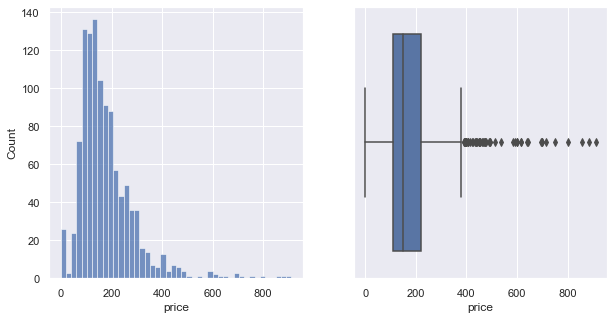

In [251]:

fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = airbnb, x='price', ax = ax[0])
sns.boxplot(data = airbnb, x='price', ax = ax[1])

### Ejercicio 1

Cree un subconjunto con el nombre `atipicos_precio` que contenga las observaciones consideradas atípicos severos de acuerdo al boxplot del precio. 

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Use un filtro para seleccionar las observaciones que cumplan el criterio (en el taller guiado de Pandas puede encontrar información útil- selección de variables).
* Los atípicos severos son las observaciones que quedan por fuera de los bígotes.
* Los bígotes pueden tener una longitud máxima de 1.5*IQ, donde IQ es el rango intercuartílico. [Aquí](https://www.data-to-viz.com/caveat/boxplot.html) puede encontrar más información.
* `atipicos_precio` debe tener dimensiones (1430, 76).



<AxesSubplot:ylabel='Frequency'>

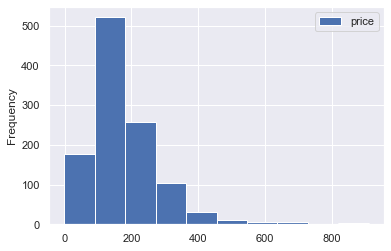

In [252]:
# Respuesta
df_price=airbnb[['price']]
df_price.plot.hist()

<AxesSubplot:xlabel='bathrooms'>

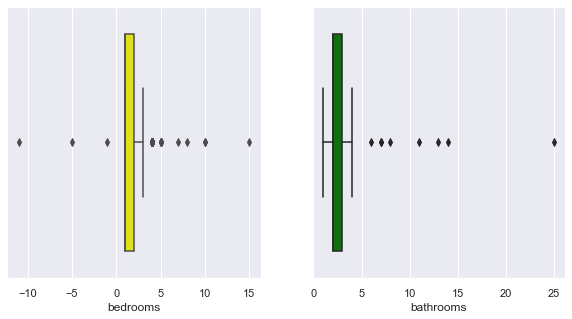

In [253]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(data = airbnb, x='bedrooms', ax = ax[0], color = 'yellow')
sns.boxplot(data = airbnb, x='bathrooms', ax = ax[1] , color = 'green')

### Ejercicio 2 (difícil)
Analicemos el subconjunto `atipicos_precio`.
* ¿Cuántos hospedajes hay en el subconjunto?
* Construya un histograma para la variable precio. Describa la distribución.
* Haga un análisis de las variables bedrooms, bathrooms. En comparación con la distribución general ¿aprecia alguna diferencia?
* Analice la ubicación de los lugares y compare con la distribución general que analizamos en la primera fase. ¿Observa algún patrón?

Si tuvo problemas con el Ejercicio 1, no se preocupe, a continuación se carga el dataset producto del primer ejercicio.



<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Compare las distribuciones de los baños y habitaciones en el conjunto general `airbnb` y en el subconjunto `atipicos_precio`.
* Haga un jointplot para comparar la distribución de la variable ubicación en el subconjunto `atipicos_precio` con respecto a la visualización obtenida en la fase 1.

In [254]:
# Respuesta
datos_iq=airbnb['price'].describe()
rango_intercuartilico=datos_iq['75%']-datos_iq['25%']


valores_atipicos_out_derecha=datos_iq['75%']+1.5*rango_intercuartilico
valores_atipicos_out_izquierda=datos_iq['25%']-1.5*rango_intercuartilico
valores_atipicos_out_derecha
valores_atipicos_out_izquierda

-55.0

In [255]:
atipicos_precio01 = airbnb.loc[airbnb['price'] > valores_atipicos_out_derecha,'price']
atipicos_precio02 = airbnb.loc[airbnb['price'] < valores_atipicos_out_izquierda,'price']

atipicos_precio=pd.concat([atipicos_precio01,atipicos_precio02])

print('Las dimensiones de atipicos_precio son: {}'.format(atipicos_precio.shape))


Las dimensiones de atipicos_precio son: (55,)


In [256]:
atipicos_precio

11      640.0
36      911.0
42      395.0
58      600.0
88      886.0
123     514.0
156     434.0
165     400.0
185     436.0
191     397.0
262     407.0
278     700.0
284     425.0
299     492.0
311     479.0
322     600.0
325     489.0
393     398.0
403     857.0
414     475.0
416     450.0
460     645.0
461     400.0
481     398.0
495     614.0
541     492.0
568     438.0
586     695.0
619     714.0
648     400.0
650     414.0
653     455.0
675     453.0
703     420.0
710     450.0
730     750.0
732     460.0
733     470.0
776     394.0
800     400.0
802     450.0
814     584.0
826     700.0
832     405.0
857     390.0
862     400.0
889     464.0
894     392.0
897     475.0
914     538.0
928     800.0
984     615.0
1082    399.0
1102    440.0
1116    590.0
Name: price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

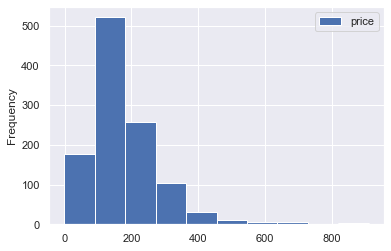

In [257]:
# Respuesta
df_price=airbnb[['price']]
df_price.plot.hist()

<AxesSubplot:xlabel='bathrooms'>

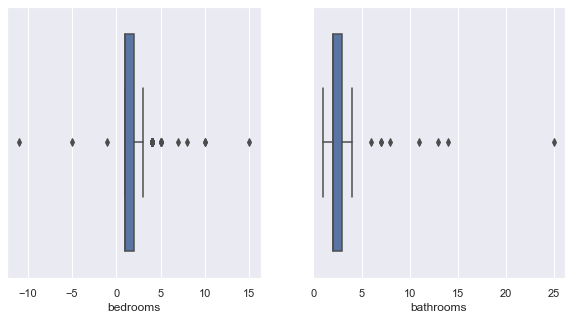

In [258]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(data = airbnb, x='bedrooms', ax = ax[0])
sns.boxplot(data = airbnb, x='bathrooms', ax = ax[1])

In [259]:
# Respuesta
#aca se calcula los valores atipicos de bedrooms y bathrooms

datos_iq_bethrooms=airbnb['bedrooms'].describe()
rango_intercuartilico_bethrooms=datos_iq_bethrooms['75%']-datos_iq_bethrooms['25%']


valores_atipicos_out_derecha_bethrooms=datos_iq_bethrooms['75%']+1.5*rango_intercuartilico_bethrooms
valores_atipicos_out_izquierda_bethrooms=datos_iq_bethrooms['25%']-1.5*rango_intercuartilico


In [260]:
# Respuesta
#aca se calcula los valores atipicos de bedrooms y bathrooms

datos_iq_bathrooms=airbnb['bathrooms'].describe()
rango_intercuartilico_bathrooms=datos_iq_bathrooms['75%']-datos_iq_bathrooms['25%']


valores_atipicos_out_derecha_bathrooms=datos_iq_bathrooms['75%']+1.5*rango_intercuartilico_bathrooms
valores_atipicos_out_izquierda_bathrooms=datos_iq_bathrooms['25%']-1.5*rango_intercuartilico_bathrooms


In [261]:
# Respuesta
atipicos_bedrooms =airbnb.loc[airbnb['bedrooms'] > valores_atipicos_out_derecha_bethrooms  ,['bedrooms']]
atipicos_bedrooms[['bedrooms']] 

,bedrooms
10,4
11,4
21,4
36,10
41,4
...,...
1047,4
1050,4
1080,4
1093,4


In [262]:
atipicos_bathrooms =airbnb.loc[airbnb['bathrooms']> valores_atipicos_out_derecha_bathrooms,['bathrooms']]
atipicos_bathrooms[['bathrooms']] 

,bathrooms
121,8
122,7
123,6
127,11
147,25
163,14
184,13
194,7


<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

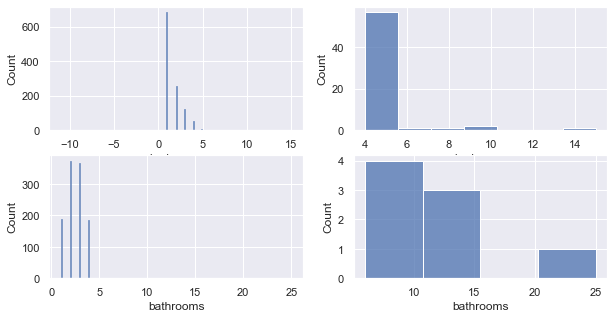

In [263]:


fig, ax = plt.subplots(2,2, figsize = (10,5))
sns.histplot(data = airbnb, x='bedrooms', ax = ax[0,0])
sns.histplot(data = atipicos_bedrooms, x='bedrooms', ax = ax[0,1])
sns.histplot(data = airbnb, x='bathrooms', ax = ax[1,0])
sns.histplot(data = atipicos_bathrooms, x='bathrooms', ax = ax[1,1])


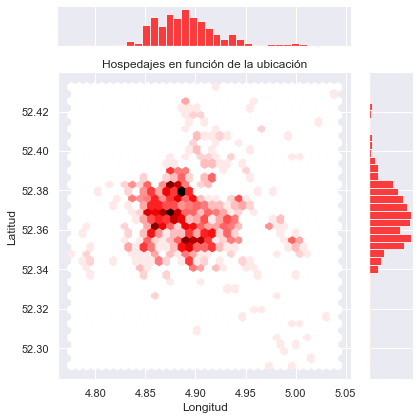

In [264]:
sns.jointplot(data = airbnb,
              x='longitude', 
              y='latitude', 
              kind="hex", # define la forma de las zonas que vamos a construir
              color = 'red')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Hospedajes en función de la ubicación')
plt.tight_layout() # Evita el sobrelapamiento de elementos

### Ejercicio 3

A partir del análisis del ejercicio anterior concluya. ¿Considera que los datos del subconjunto `atipicos_precio` son errores y deben ser eliminados? ¿Cuál considera una razón importante para el aumento significativo de los precios?

Respuesta

Considero que los valores atípicos no deben ser reemplazados con valores como la média.

En cuanto a la razón de incremento de los precios debe ser generalmente porque son nuesvos host y no están relacionados con los precios del mercado, por ello entiendo que los precios se van regulando posteriormente cuando los hospedadores trabajen algún tiempo con AIRBNB.

### Ejercicio 4

Partiendo del dataset general `airbnb` cree un subconjunto con los hospedajes con precio menor o igual a 10 dólares/noche. ¿Cuántos hospedajes tiene el nuevo subconjunto? ¿Cuántos hospedajes tienen un precio de 0 dólares/noche?
¿Cuántos hospedajes tienen un precio de 10 dólares/noche? 

Basado en la exploración anterior responda: 
* ¿Cuál es el precio mínimo de un hospedaje en la ciudad de Amsterdam? 
* Sugiera alternativas para lidiar con los hospedajes con precio 0.


In [265]:
# Respuesta
airbnb_sub_price_menor_igual_10=airbnb.loc[airbnb['price']<=10,'price']

¿Cuántos hospedajes tiene el nuevo subconjunto?

In [266]:
print('El nuevo subconjunto tiene {} registros de hospedajes'.format(airbnb_sub_price_menor_igual_10.shape[0]))

El nuevo subconjunto tiene 26 registros de hospedajes


¿Cuántos hospedajes tienen un precio de 0 dólares/noche?

In [267]:
print('El nuevo subconjunto tiene {} registros de hospedajes con valor de 0'.format(airbnb.loc[airbnb['price']==0,'price'].count()))


El nuevo subconjunto tiene 1 registros de hospedajes con valor de 0


¿Cuántos hospedajes tienen un precio de 10 dólares/noche? 

In [268]:
print('El nuevo subconjunto tiene {} registros de hospedajes con valor de 10 dólares'.format(airbnb.loc[airbnb['price']==10,'price'].count()))

El nuevo subconjunto tiene 0 registros de hospedajes con valor de 10 dólares


### Ejercicio 5

Elimine los hospedajes con precio igual a cero. Cree un dataframe llamado `airbnb2` con esta modificación, deberá tener 30173 observaciones y las mismas 76 variables.



<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

Existen diferentes formas para eliminar registros usando una condición.
1. Haga un filtro que guarde los hospedajes con precio diferente de 0.
2. Obtenga los índices de las observaciones con precio igual a cero y utilice el método `.drop` para eliminarlas.

Se determina los valores diferentes de 0 y se soluciona el problema

In [269]:
# Respuesta
airbnb.loc[airbnb['price']!=0,['price']].index
valores_lista_diferente_cero=airbnb.loc[airbnb['price']==0,['price']].index
airbnb2=airbnb.drop(valores_lista_diferente_cero)
airbnb2.shape

(1121, 74)

## **Valores nulos**

Una de las tareas obligatorias en esta fase de limpieza es detectar y explorar los valores nulos. Haga esa inspección con el dataframe `airbnb2` que acabamos de crear .

### Ejercicio 6

Obtenga una tabla de frecuencia con las 20 variables con mayor cantidad de valores nulos. Calcule el porcentaje de valores nulos para cada variable.
Responda las siguientes preguntas:
* Proponga soluciones para el problema de las variables con más de 25% de valores nulos.
* Considere la variable neighbourhood, en la fase pasada encontramos que es una variable determinante en el precio, plantee soluciones para hacer el relleno de valores faltantes presentes en esta variable.

Recuerde justificar su propuesta usando los recursos vistos en clase.


<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Utilice el método `.isnull()` este dará como resultado un booleano para cada valor dentro del DataFrame `airbnb2`.
* Otros métodos útiles: `.sum()`, `sort_values()`





In [270]:
# Obtenga una tabla de frecuencia con las 20 variables con mayor cantidad de valores nulos.
# Respuesta 
airbnb2.isnull().sum().sort_values(ascending=False).head(20)



host_response_rate        327
host_response_time        327
host_acceptance_rate      206
price                       1
id                          0
availability_30             0
calendar_last_scraped       0
availability_365            0
availability_90             0
availability_60             0
has_availability            0
number_of_reviews_ltm       0
calendar_updated            0
maximum_nights_avg_ntm      0
minimum_nights_avg_ntm      0
maximum_maximum_nights      0
minimum_maximum_nights      0
maximum_minimum_nights      0
minimum_minimum_nights      0
maximum_nights              0
dtype: int64

In [271]:
#Calcule el porcentaje de valores nulos para cada variable.
# Respuesta
airbnb2.isnull().sum().sort_values(ascending=False).head(20)/airbnb2.shape[0]*100


host_response_rate        29.170384
host_response_time        29.170384
host_acceptance_rate      18.376450
price                      0.089206
id                         0.000000
availability_30            0.000000
calendar_last_scraped      0.000000
availability_365           0.000000
availability_90            0.000000
availability_60            0.000000
has_availability           0.000000
number_of_reviews_ltm      0.000000
calendar_updated           0.000000
maximum_nights_avg_ntm     0.000000
minimum_nights_avg_ntm     0.000000
maximum_maximum_nights     0.000000
minimum_maximum_nights     0.000000
maximum_minimum_nights     0.000000
minimum_minimum_nights     0.000000
maximum_nights             0.000000
dtype: float64

#Proponga soluciones para el problema de las variables con más de 25% de valores nulos.
En el caso de variables de tipo numerico se debe determinar valores como la mediana para reemplazar los valores faltantes

Considere la variable neighbourhood, en la fase pasada encontramos que es una variable determinante en el precio, plantee soluciones para hacer el relleno de valores faltantes presentes en esta variable.
**En este caso en la variable neighbourhood se debe limpiar los datos con  la utilización de la mediana**

### Ejercicio 7

Basado en su propuesta del ejercicio 6, ejecute las soluciones que estén dentro de su alcance técnico. Al menos una de ellas.


In [272]:
# Respuesta
airbnb2.isnull().sum().sort_values(ascending=False).head(20)/airbnb2.shape[0]*100


host_response_rate        29.170384
host_response_time        29.170384
host_acceptance_rate      18.376450
price                      0.089206
id                         0.000000
availability_30            0.000000
calendar_last_scraped      0.000000
availability_365           0.000000
availability_90            0.000000
availability_60            0.000000
has_availability           0.000000
number_of_reviews_ltm      0.000000
calendar_updated           0.000000
maximum_nights_avg_ntm     0.000000
minimum_nights_avg_ntm     0.000000
maximum_maximum_nights     0.000000
minimum_maximum_nights     0.000000
maximum_minimum_nights     0.000000
minimum_minimum_nights     0.000000
maximum_nights             0.000000
dtype: float64

## **Transformación de variables**

Ya hemos lidiado con datos atípicos y valores faltantes. Ahora procedamos a transformar nuestras características según las necesidades de cada variable. Vamos a seleccionar 11 variables para crear nuestro modelo basados en los análisis exploratorios realizados previamente. Recuerde, la variable objetivo es el precio. En la fase 3 construiremos un modelo que nos permita predecir el precio a partir de 10 variables predictoras. Vamos a preparar nuestros datos con ese propósito.

Para garantizar que todos trabajemos con los mismos datos, a continuación se entrega un dataset filtrado sin datos nulos y sin atípicos severos.

In [273]:
clean = pd.read_csv('https://github.com/HarryVargas96/UdeCataluna/blob/main/data/clean_airbnb.csv?raw=true')
clean.head()

,price,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,host_is_superhost,parking
0,149,Brooklyn,40.64749,-73.97237,Apartment,Private room,1.0,1,1,0.0,1
1,150,Harlem,40.80902,-73.94190,Apartment,Private room,1.0,1,1,0.0,-1
2,190,Harlem,40.79685,-73.94872,Apartment,Entire home/apt,1.0,2,2,0.0,-1
3,60,Brooklyn,40.65599,-73.97519,Condominium,Private room,1.0,1,1,1.0,1
4,80,Manhattan,40.86754,-73.92639,Apartment,Private room,1.0,1,1,0.0,1


In [274]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30173 entries, 0 to 30172
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              30173 non-null  int64  
 1   neighbourhood      30173 non-null  object 
 2   latitude           30173 non-null  float64
 3   longitude          30173 non-null  float64
 4   property_type      30173 non-null  object 
 5   room_type          30173 non-null  object 
 6   bathrooms          30173 non-null  float64
 7   bedrooms           30173 non-null  int64  
 8   beds               30173 non-null  int64  
 9   host_is_superhost  30173 non-null  float64
 10  parking            30173 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 2.5+ MB


### Ejercicio 8

Examine cada una de las variables seleccionadas. Su tipología computacional (int, float, object) y su tipología estadística (ordinal, nominal, continúa, discreta). Seleccione la transformación más apropiada para cada variable, asegúrese de incluir todas las variables en alguna lista. Solo debe escribir el nombre de la variable dentro de la lista, por ejemplo:

```
lista = ['price', 'bedrooms']
```



In [275]:
# Respuesta
# que campos del dataset airbnb no se deben transformar


sin_transformacion = ['price', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds'  ]
dummy_var = ['property_type', 'room_type',  'host_is_superhost', 'parking']
ordinal_encoding = ['property_type', 'room_type', 'host_is_superhost']
normalizacion = ['price', 'bathrooms', 'bedrooms', 'beds']
estandarizacion = ['price', 'bathrooms', 'bedrooms', 'beds']

## Variables categóricas

Recuerde que la transformación de variables categóricas o tipo object es obligatoria a la hora de construir modelos, los algoritmos de Machine Learning NO entienden los strings como `'condominio' 'Brooklyn' 'Manhattan'`. Es por eso que debemos numerizar estas variables.





In [276]:
# Filtremos las variables tipo object

clean_object = clean.select_dtypes(include = 'object')
clean_object.head()

,neighbourhood,property_type,room_type
0,Brooklyn,Apartment,Private room
1,Harlem,Apartment,Private room
2,Harlem,Apartment,Entire home/apt
3,Brooklyn,Condominium,Private room
4,Manhattan,Apartment,Private room


Consideremos ahora los niveles que pueden tomar cada una de las variables.

In [277]:
for variable in clean_object.columns:
  niveles = clean_object[variable].nunique()
  print('La variable {}, tiene {} niveles.'.format(variable,niveles))

La variable neighbourhood, tiene 186 niveles.
La variable property_type, tiene 33 niveles.
La variable room_type, tiene 3 niveles.


Las 3 variables son cualitativas ordinales, por lo que una transformación tipo dummy sería lo más apropiado, sin embargo, sí hacemos esto crearíamos un dataframe con 222 variables adicionales, esto puede entorpecer el trabajo con el dataframe. Por lo cual haremos lo siguiente:
1. Aplicar la transformación dummy a la variable room_type.
2. Aplicar ordinal encoding a las variables neighbourhood y property_type.

### Ejercicio 9

Aplique la transformación dummy sobre el dataframe `clean` solamente para la variable room_type. 

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Utilice la función de pandas `pd.get_dummies()`.
* Use el parámetro `column` para indicar cual columna debe ser transformada. Para más información consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)


In [278]:
# Respuesta
# sobre el dataframe clean aplique get_dummies para la columna room_type

clean_room_type = pd.get_dummies(clean['room_type'])
clean_room_type

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
30168,0,1,0
30169,0,1,0
30170,0,1,0
30171,0,0,1


### Ejercicio 10

Aplique la transformación ordinal sobre las variables neighbourhood y property_type. Nombre su tranformador ordinal como `encoder`. Guarde el resultado en un objeto llamado `ord_vars`.




In [279]:
from sklearn.preprocessing import OrdinalEncoder
# Aplique la transformación ordinal sobre las variable neighbourhood

encoder = OrdinalEncoder()
ord_vars = encoder.fit_transform(clean[['neighbourhood','property_type']])



### Ejemplo 1

Más información acerca de los codificadores Ordinales, solo ejecute el resto de este código cuando haya obtenido la respuesta de arriba.

El método Ordinal Encoder de scikitlearn organiza las categorías en orden alfabético. A continuación se muestra el objeto que contiene la información sobre la codificación.

In [280]:
encoder.categories_

# Retorna dos listas con dos arreglos de numpy
# Cada arreglo contiene las categorías de cada variable transformada

[array(['Allerton', 'Alphabet City', 'Annadale', 'Astoria', 'Bath Beach',
        'Battery Park City', 'Bay Ridge', 'Baychester', 'Bayside',
        'Bedford Park', 'Bedford-Stuyvesant', 'Belmont', 'Bensonhurst',
        'Bergen Beach', 'Boerum Hill', 'Borough Park', 'Brighton Beach',
        'Bronxdale', 'Brooklyn', 'Brooklyn Heights', 'Brooklyn Navy Yard',
        'Brownsville', 'Bushwick', 'Canarsie', 'Carroll Gardens',
        'Castle Hill ', 'Castleton Corners', 'Chelsea', 'Chinatown',
        'City Island', 'Civic Center', 'Claremont', 'Clinton Hill',
        'Cobble Hill', 'College Point', 'Columbia Street Waterfront',
        'Concord', 'Concourse', 'Concourse Village', 'Coney Island',
        'Corona', 'Crotona', 'Crown Heights', 'DUMBO',
        'Ditmars / Steinway', 'Dongan Hills', 'Downtown Brooklyn',
        'Dyker Heights', 'East Elmhurst', 'East Flatbush', 'East Harlem',
        'East New York', 'East Village', 'Eastchester', 'Edenwald',
        'Elm Park', 'Elmhurst', '

Creemos diccionarios en formato csv con la codificación de ambas variables. El proceso de documentación es clave en el proyecto.

In [281]:
# Extraemos el arreglo relacionado con los barrios

categories_neigh = encoder.categories_[0]

# Creamos una lista con números igual a la longitud del arreglo de los barrios

neigh_codes = [i for i in range(len(categories_neigh))]

# Creamos un dataframe con los barrios y códigos

barrios = pd.DataFrame({'codigo': neigh_codes,
                        'barrio': categories_neigh})

# Creamos un archivo csv para la documentación del proceso

barrios.to_csv('Diccionario barrios airbnb.csv')

barrios.head()


,codigo,barrio
0,0,Allerton
1,1,Alphabet City
2,2,Annadale
3,3,Astoria
4,4,Bath Beach


In [282]:

# Extraemos el arreglo relacionado con el tipo de propiedad

categories_property = encoder.categories_[1]

# Creamos una lista con números igual a la longitud del arreglo de los tipos de propiedad

property_codes = [i for i in range(len(categories_property))]

# Creamos un dataframe con los tipos de propiedad y códigos

propiedades = pd.DataFrame({'codigo': property_codes,
                        'barrio': categories_property})

# Creamos un archivo csv para la documentación del proceso

propiedades.to_csv('Diccionario tipos de propiedad airbnb.csv')
propiedades.head()



,codigo,barrio
0,0,Aparthotel
1,1,Apartment
2,2,Barn
3,3,Bed and breakfast
4,4,Boat


Para finalizar, reemplazamos las variables transformadas en nuestro dataframe original. Y damos un vistazo a nuestro dataframe con todas las variables codificadas como númericas.

In [283]:
# Convertimos el arreglo de numpy en un dataframe

ord_vars = pd.DataFrame(ord_vars,columns = ['neighbourhood','property_type'])
ord_vars.head()

,neighbourhood,property_type
0,18.0,1.0
1,80.0,1.0
2,80.0,1.0
3,18.0,12.0
4,101.0,1.0


In [284]:
# Reemplazamos en nuestro dataset original

for variable in ord_vars.columns:
  clean[variable] = ord_vars[variable]

clean.head()

,price,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,host_is_superhost,parking
0,149,18.0,40.64749,-73.97237,1.0,Private room,1.0,1,1,0.0,1
1,150,80.0,40.80902,-73.94190,1.0,Private room,1.0,1,1,0.0,-1
2,190,80.0,40.79685,-73.94872,1.0,Entire home/apt,1.0,2,2,0.0,-1
3,60,18.0,40.65599,-73.97519,12.0,Private room,1.0,1,1,1.0,1
4,80,101.0,40.86754,-73.92639,1.0,Private room,1.0,1,1,0.0,1


### Ejercicio 11

Observe la variables parking y host_is_superhost son binarias. Solo toman valores de Falso (0) y Verdadero (1). Sin embargo, la variable parking tiene una codificación extraña con -1 como código de Falso, lo cual que puede ocasionar algunos inconvenientes. Encuentre todos los campos de la variable parking que contengan -1.0 y reemplacelos por 0.0. 

<details>    
<summary>
    <font size="3" color="darkblue"><b>Pistas</b></font>
</summary>

* Utilice el método de pandas `.map()`.
* Para más información consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

In [285]:

clean.loc[clean['parking']==-1,'parking'] = 0
clean

,price,neighbourhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,host_is_superhost,parking
0,149,18.0,40.64749,-73.97237,1.0,Private room,1.0,1,1,0.0,1
1,150,80.0,40.80902,-73.94190,1.0,Private room,1.0,1,1,0.0,0
2,190,80.0,40.79685,-73.94872,1.0,Entire home/apt,1.0,2,2,0.0,0
3,60,18.0,40.65599,-73.97519,12.0,Private room,1.0,1,1,1.0,1
4,80,101.0,40.86754,-73.92639,1.0,Private room,1.0,1,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
30168,65,89.0,40.69137,-73.80844,21.0,Private room,2.0,4,3,0.0,1
30169,70,10.0,40.67853,-73.94995,29.0,Private room,1.0,1,2,0.0,1
30170,40,18.0,40.70184,-73.93317,1.0,Private room,1.0,1,1,0.0,0
30171,55,81.0,40.75751,-73.99112,1.0,Shared room,1.0,1,1,0.0,1


### Ejercicio 12

Para finalizar, escriba algunas conclusiones de sus hallazgos y haga una lista cronológica con todas las modificaciones que se hicieron hasta obtener el dataframe clean final. Si tiene ideas adicionales que no hayamos ejecutado en este análisis por favor incluyalas en forma de recomendación para la siguiente iteración del proceso. 



Respuesta

En esta fase se ha podido entender de mejor manera la utilización de las diferentes técnicas de  manejo de información para lograr una transformación y completamiento de campos vacios, permitiéndonos manejar las lbrerias de manejo de datos como son pandas,numpy, matplotlib, seaborn e iniciar con scikit-learn para limpieza, tranformador y preprocessing de datos.

Machine learning se está convirtiendo en una función importante en varios sectores comerciales. 
Los programas de machine learning se ejecutan con datos y la necesidad de grandes cantidades de datos. 
Pero más que grandes cantidades de datos, la buena calidad de los datos es fundamental para obtener el resultado final deseado.

Es importante entender que el análisis predictivo necesita de un gran trabajo con los datos. 
Para poder trabajar algoritmos de agrupación, clasificación o regresión necesita tener datos de calidaden su entrada.

La transformación de los datos, trata de generar nuevos campos predictores basados en los que ya se tienen. El conocimiento del dominio (del negocio, del ámbito que se está analizando) es fundamental para abordar esta fase. Esta, junto con la fase de selección de campos predictores, son las que más esfuerzo intelectual y creativo necesitan, ya que no sólo hay que conocer el ámbito de estudio, sino que es necesario conocer con cierta profundidad cómo funcionan los algoritmos predictivos, cómo interpretan internamente los datos y cómo se buscan las relaciones entre ellos.

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*